<a href="https://colab.research.google.com/github/atenchen/220-lab4/blob/master/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Alvin Chen <br> B-Number: B00760047 <br> Email: achen172@binghamton.edu

Part 1: Numerical Inversion by Binary Search

Invert function:

In [25]:
from re import M
import math
from scipy.special import gamma, factorial


def invert(f, y, left_bound, right_bound):
  if(f(left_bound) >= y or f(right_bound) <= y):
    print("X value s.t. f(x) = y D.N.E. within given bounds")
    return
  LB = left_bound
  RB = right_bound
  while not math.isclose(LB, RB, rel_tol= 10**(-16)):
    Mean = (LB + RB)/2
    y_Prime = f(Mean)
    ##print(y - y_Prime)
    if math.isclose(y_Prime, y, rel_tol= 10**(-16)):
      return Mean
    if(y_Prime > y):
      RB = Mean
    else:
      LB = Mean
    if Mean == (LB + RB)/2:
      return Mean
  return (LB + RB)/2


Transcendental Function:

In [146]:
def g(x):
  return x * math.e**x + x

print(g(invert(g, 1800, -10, 10)))
print(g(invert(g, 18, -10, 10)))
print(g(invert(g, 56, -10, 10)))
print(g(invert(g, 800, -10, 10)))

1799.9999999999986
17.99999999999999
56.0
799.9999999999999


Gamma Function:

In [148]:
print(gamma(invert(gamma,1000000000000, 1.5, 16)))
print(gamma(invert(gamma,13422342, 1.5, 16)))
print(gamma(invert(gamma,2342300, 1.5, 16)))

1000000000000.0034
13422341.999999953
2342299.999999998


Part 2: Numerical Integration

Integrate function:

In [28]:
import math
def integrate(f, left_bound, right_bound):
  step_size = (right_bound - left_bound)/1000000
  index = left_bound
  ret = 0
  while index < right_bound:
    ret += step_size * (f(index) + f(index + step_size)) / 2
    index += step_size
  return ret


Test function:

In [29]:
def g(x):
  return math.sin(x)/x
print(g(1))
print(integrate(g,-1,1))

0.8414709848078965
1.8921678236770465


Part 3: Gradient Descent

Optimizer function

In [160]:
import math
import array as arr


def opt(grad, start, step):
  location = list(start)
  g_vector = grad(location)
  grad_des = [start]
  iterations = 0
  while(iterations < 10000):
    vector_magnitude = 0
    step_vector = []
    for x in g_vector:
      vector_magnitude += x**2
    vector_magnitude = math.sqrt(vector_magnitude)
    for x in g_vector:
      if math.isclose(vector_magnitude,0):
        return grad_des
      step_vector.append(x / vector_magnitude * step)
    i = 0
    for x in location:
      location[i] -= step_vector[i]
      i += 1
    ##print(thcf(location[0], location[1]))
    grad_des.append(tuple(location))
    g_vector = grad(tuple(location))
    iterations += 1
  return grad_des





Three-Hump Camel Function

smallest minimum:
1.9160082799604434e-07


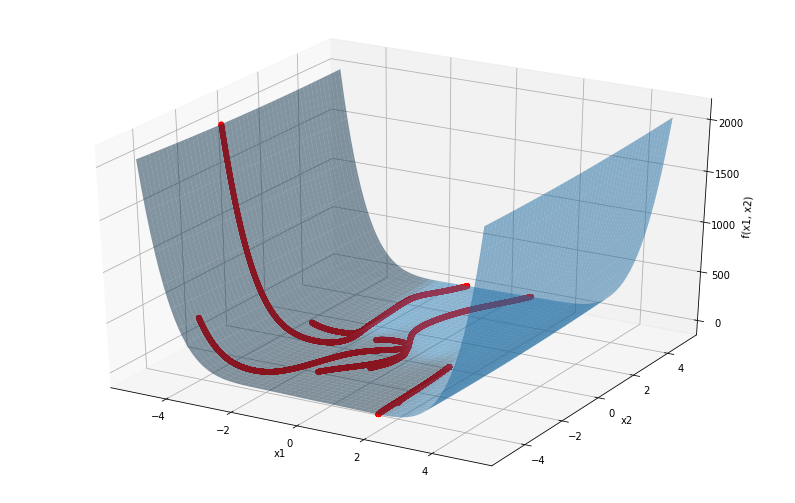

In [174]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import random

# implementation of thcf

def thcf(x1, x2):
  return 2*(x1**2) - 1.05*(x1**4) + (x1**6)/6 + x1 * x2 + x2**2

# implementation of the gradient function of thcf
def thcf_grad(point):
  x1 = point[0]
  x2 = point[1]
  return (4*x1 - 4.2*(x1**3) + x1**5 + x2, x1 + 2*x2) 

# print(opt(thcf_grad, (random.randrange(11) - 5, random.randrange(11) - 5), 0.001)) >> Commented out test for optimizer using gradient of thcf

# surface-plot of thcf

x = np.linspace(-5,5,num = 100)
y = np.linspace(-5,5,num = 100)
x,y = np.meshgrid(x,y)
z = (thcf(x,y))
z_prime = thcf(y,x)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax = plt.axes(projection ='3d')

ax.plot_surface(x, y, z, alpha = 0.5)

# scatter plot of 10 different paths of gradient descent
# prints out value of the smallest minimum found 

smallest_minimum_point = opt(thcf_grad,( random.randrange(21) - 10, random.randrange(21) - 10), 0.001)[-1]
smallest_minimum = thcf(smallest_minimum_point[0], smallest_minimum_point[1])
for i in range(10):
  grad_desc = opt(thcf_grad,( random.randrange(11) - 5, random.randrange(11) - 5), 0.001)
  x_axis = []
  y_axis = []
  for i in grad_desc:
    x_axis.append(i[0])
    y_axis.append(i[1])
  if smallest_minimum > thcf(x_axis[-1],y_axis[-1]):
    smallest_minimum_point = grad_desc[-1]
    smallest_minimum = thcf(x_axis[-1],y_axis[-1])
  vector_thcf = np.vectorize(thcf)
  z_axis = vector_thcf(x_axis, y_axis)
  ax.scatter3D(x_axis, y_axis, z_axis, color = 'red')
print("smallest minimum:")
print(smallest_minimum)
ax.scatter3D(x_axis, y_axis, z_axis, color = 'red')

ax.set_ylabel('x2')
ax.set_xlabel('x1')
ax.set_zlabel('f(x1, x2)')

plt.show()

2-D Shubert Function

smallest minimum:
-84.80836812243558


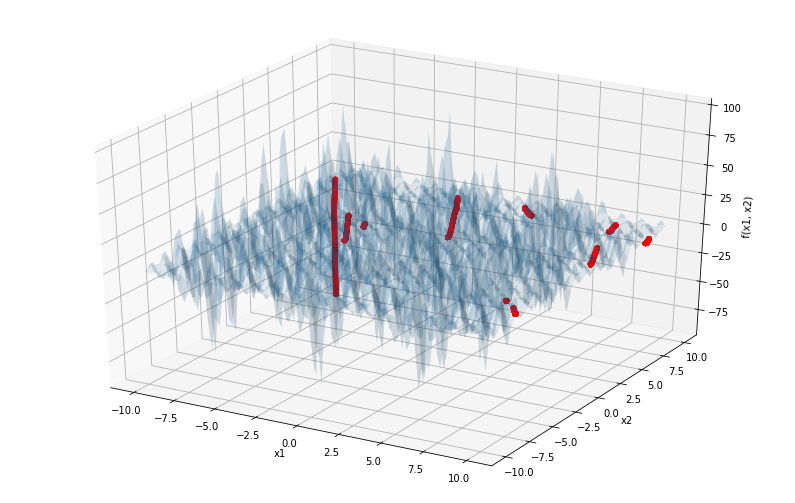

In [175]:
# implementation of sf

def sf(x1, x2):
  sum1 = 0
  sum2 = 0
  for i in range(1,5):
    new1 = i * math.cos((i+1) * x1 + i)
    new2 = i * math.cos((i+1) * x2 + i)
    sum1 = sum1 + new1
    sum2 = sum2 + new2
  return sum1 * sum2

# implementation of the gradient function of sf

def sf_grad(point):
  x1 = point[0]
  x2 = point[1]
  sum1 = 0
  sum2 = 0
  for i in range(1,5):
    new1 = -i * (i+1) * math.sin((i+1)*x1 + i)
    new2 = i * math.cos((i+1)*x2 + i)
    sum1 = sum1 + new1
    sum2 = sum2 + new2
  x1_partial = sum1 * sum2
  sum1 = 0
  sum2 = 0
  for i in range(1,5):
    new1 = i * math.cos((i+1)*x1 + i)
    new2 = -i * (i+1) * math.sin((i+1)*x2 + i)
    sum1 = sum1 + new1
    sum2 = sum2 + new2
  x2_partial = sum1 * sum2
  return (x1_partial, x2_partial)


# print(opt(sf_grad, (4,2), 0.001)) >> Commented out test for optimizer using gradient of sf

# surface-plot of sf


x = np.linspace(-10,10,num = 100)
y = np.linspace(-10,10,num = 100)
x,y = np.meshgrid(x,y)
vector_sf = np.vectorize(sf)
z = (vector_sf(x,y))

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

ax.plot_surface(x, y, z, alpha = 0.1)

# scatter plot of 10 different paths of gradient descent
# prints out value of the smallest minimum found

smallest_minimum_point = opt(sf_grad,( random.randrange(21) - 10, random.randrange(21) - 10), 0.001)[-1]
smallest_minimum = sf(smallest_minimum_point[0], smallest_minimum_point[1])
for i in range(10):
  grad_desc = opt(sf_grad,( random.randrange(21) - 10, random.randrange(21) - 10), 0.001)
  x_axis = []
  y_axis = []
  for i in grad_desc:
    x_axis.append(i[0])
    y_axis.append(i[1])
  if smallest_minimum > sf(x_axis[-1],y_axis[-1]):
    smallest_minimum_point = grad_desc[-1]
    smallest_minimum = sf(x_axis[-1],y_axis[-1])
  vector_sf = np.vectorize(sf)
  z_axis = vector_sf(x_axis, y_axis)
  ax.scatter3D(x_axis, y_axis, z_axis, color = 'red')
print("smallest minimum:")
print(smallest_minimum)

ax.set_ylabel('x2')
ax.set_xlabel('x1')
ax.set_zlabel('f(x1, x2)')

plt.show()